<a href="https://colab.research.google.com/github/tiagopessoalima/ED1/blob/main/Semana_04_(ED1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[Selection Sort](https://www.youtube.com/watch?v=0-W8OEwLebQ)**

A ordenação por **seleção** pode ser vista como uma otimização em relação ao *Bubble Sort* e ao *Insertion Sort*, pois realiza **apenas uma troca por passagem** pela lista. O algoritmo percorre a lista procurando o **maior** (ou **menor**) elemento durante cada iteração. Ao final dessa varredura, realiza-se **uma única troca**, posicionando o elemento encontrado em sua posição final correta. Assim como no *Bubble Sort*, após a **primeira passagem** o maior (ou menor) elemento já estará em sua posição definitiva. Após a **segunda passagem**, o segundo maior (ou menor) elemento também estará posicionado corretamente, e assim sucessivamente. Para ordenar $n$ elementos, são necessárias exatamente $n - 1$ passagens, pois o último elemento estará automaticamente ordenado após a $(n-1)$‑ésima passagem. A figura abaixo ilustra o processo de ordenação completo aplicado a uma lista contendo os elementos: $26, 54, 93, 17, 77, 31, 44, 55, 20$.


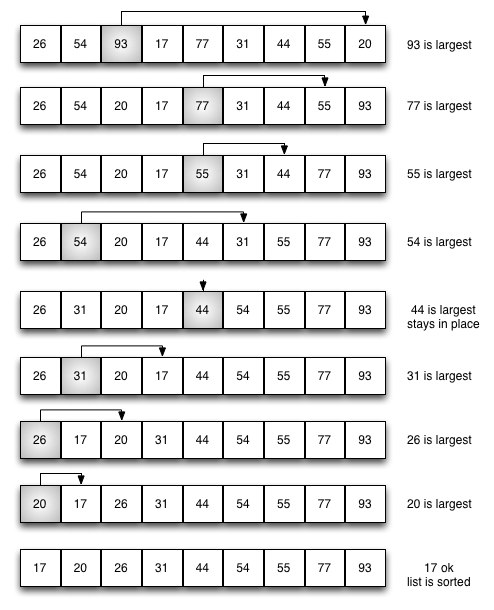

###**Descrição Formal**


Dado um vetor $A[0 \dots n-1]$:

1. **Inicialização:**
   Considere o subvetor $A[0 \dots i-1]$ como **ordenado** para cada $i$ no intervalo $1 \dots n-1$.

2. **Iteração:**
   Para cada $i$ de $0$ até $n-2$:

   * Defina $\text{min_index}$ $\leftarrow i$
   * Para cada $j$ de $i+1$ até $n-1$:

     * Se $A[j] < A[\text{min_index}]$, atualize:
       $\text{min\_index} \leftarrow j$
   * Troque $A[i]$ com $A[\text{min_index}]$

### **Pseudocódigo**

```text
SelectionSort(A, n):
    para i ← 0 até n-2:
        min_index ← i

        para j ← i+1 até n-1:
            se A[j] < A[min_index]:
                min_index ← j

        se min_index ≠ i:
            trocar A[i] ↔ A[min_index]
```

###**Implementação**

Serão implementadas duas variações: iterativa, que seleciona repetidamente o menor elemento da porção não ordenada e o coloca na posição correta, e recursiva, que aplica a mesma lógica de seleção a subconjuntos progressivamente menores da lista.

#### **Implementação Iterativa**

A abordagem iterativa fundamenta-se no processo de percorrer sequencialmente a sequência de entrada, expandindo progressivamente a porção ordenada do vetor. Em cada iteração, identifica-se o menor elemento da porção não ordenada e realiza-se sua troca com o elemento na posição inicial dessa porção. Esse procedimento é repetido até que todos os elementos tenham sido reposicionados em suas posições corretas, resultando em uma sequência completamente ordenada ao término do laço principal.

In [13]:
def selection_sort(lista):
    """
    Ordena a lista utilizando o algoritmo Selection Sort (versão iterativa).
    Algoritmo não estável, in-place, com complexidade O(n²) no pior e no melhor caso.
    """
    n = len(lista)  # Tamanho da lista de entrada

    # Percorre a lista, posição por posição
    for i in range(n - 1):
        min_index = i  # Assume que o índice atual contém o menor elemento

        # Busca o menor elemento na porção não ordenada
        for j in range(i + 1, n):
            if lista[j] < lista[min_index]:
                min_index = j  # Atualiza o índice do menor elemento encontrado

        # Troca o elemento da posição i com o menor encontrado
        lista[i], lista[min_index] = lista[min_index], lista[i]

#### **Implementação Recursiva**

A abordagem recursiva fundamenta-se no princípio de que a seleção do menor elemento da porção não ordenada e sua colocação na posição inicial dessa porção é uma operação repetitiva que, quando aplicada sucessivamente, reorganiza gradualmente toda a sequência. A recursão implementa essa lógica por meio de chamadas aninhadas, em que cada invocação resolve um subproblema de tamanho $n-1$, deslocando progressivamente o limite entre as porções ordenada e não ordenada. O processo prossegue até a condição de parada — quando resta uma subsequência de tamanho unitário, já ordenada por definição.

In [14]:
def selection_sort_recursivo(lista, i=0):
    """
    Ordena a lista utilizando o algoritmo Selection Sort (versão recursiva).
    Algoritmo não estável, in-place, com complexidade O(n²) no pior e no melhor caso.
    """
    n = len(lista)  # Tamanho da lista de entrada

    # Caso base: quando i chega ao penúltimo índice, a lista já está ordenada
    if i < n - 1:
        min_index = i  # Assume que o índice atual contém o menor elemento

        # Busca o menor elemento na porção não ordenada
        for j in range(i + 1, n):
            if lista[j] < lista[min_index]:
                min_index = j

        # Troca o elemento da posição i com o menor encontrado
        lista[i], lista[min_index] = lista[min_index], lista[i]

        # Chama recursivamente para ordenar o restante da lista
        selection_sort_recursivo(lista, i + 1)

### **Exemplo de Uso**

In [15]:
numeros = [64, 34, 25, 12, 22, 11, 90]
print("Lista original:", numeros)
selection_sort(numeros)
print("Lista ordenada:", numeros)

Lista original: [64, 34, 25, 12, 22, 11, 90]
Lista ordenada: [11, 12, 22, 25, 34, 64, 90]


### **Análise do Tempo**

Abaixo está o gráfico comparativo do tempo gasto pelas duas diferentes implementações do *Selection Sort*.

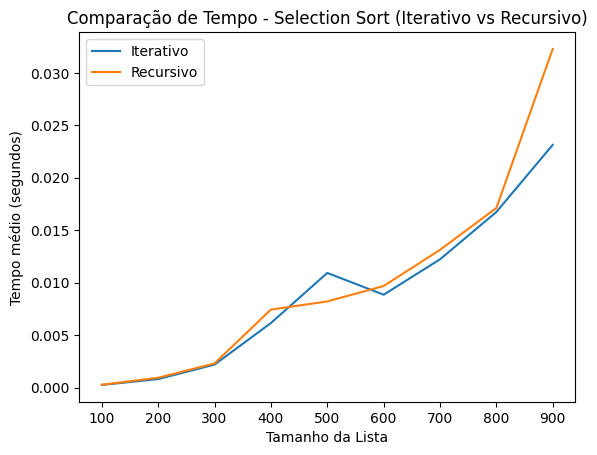

In [16]:
import time
import matplotlib.pyplot as plt

# Tamanhos das listas para análise
tamanhos_listas = [100, 200, 300, 400, 500, 600, 700, 800, 900]

tempos_iterativo = []
tempos_recursivo = []
num_execucoes = 100  # Número de execuções para média

for tamanho in tamanhos_listas:
    lista_base = list(range(tamanho, 0, -1))  # Lista decrescente

    # Tempo médio versão iterativa
    soma_tempos_iterativo = 0
    for _ in range(num_execucoes):
        dados = lista_base.copy()
        inicio = time.time()
        selection_sort(dados)
        fim = time.time()
        soma_tempos_iterativo += (fim - inicio)
    tempos_iterativo.append(soma_tempos_iterativo / num_execucoes)

    # Tempo médio versão recursiva
    soma_tempos_recursivo = 0
    for _ in range(num_execucoes):
        dados = lista_base.copy()
        inicio = time.time()
        selection_sort_recursivo(dados)
        fim = time.time()
        soma_tempos_recursivo += (fim - inicio)
    tempos_recursivo.append(soma_tempos_recursivo / num_execucoes)

# Plotagem dos resultados
plt.plot(tamanhos_listas, tempos_iterativo, label='Iterativo')
plt.plot(tamanhos_listas, tempos_recursivo, label='Recursivo')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Tempo médio (segundos)')
plt.title('Comparação de Tempo - Selection Sort (Iterativo vs Recursivo)')
plt.legend()
plt.show()

### **Complexidade**

No *Selection Sort*, independentemente da ordem inicial da sequência, o algoritmo sempre percorre toda a porção não ordenada para encontrar o menor elemento em cada iteração.

Em cada passo:

* O **1º elemento** é comparado com **n‑1** elementos;
* O **2º elemento** é comparado com **n‑2** elementos;
* O **3º elemento** é comparado com **n‑3** elementos;
* …
* O **(n‑1)º elemento** é comparado com **1** elemento.

Portanto, o número total de comparações é:

$$
(n-1) + (n-2) + (n-3) + \dots + 1
$$

Essa soma corresponde à **soma dos primeiros \$n-1\$ números inteiros positivos**, dada por:

$$
\frac{n(n-1)}{2}
$$

Como essa contagem de comparações ocorre **tanto no pior quanto no melhor caso**, a complexidade assintótica do *Selection Sort* é:

$$
O(n^2)
$$

Portanto, diferentemente de algoritmos como o *Insertion Sort*, o *Selection Sort* não apresenta ganho de desempenho significativo quando a lista já está ordenada, pois realiza o mesmo número de comparações em todos os cenários.

### **Vantagens e Limitações**

#### **Vantagens**

* **Implementação Simples:** Fácil implementação, facilitando seu uso em contextos educacionais e aplicações simples.
* **Custo de Troca Controlado:** O número de trocas é proporcional a $O(n)$, independente da configuração inicial dos dados, característica útil quando a operação de troca é significativamente mais custosa que comparações — como em sistemas embarcados.
* **Integração em Algoritmos Compostos:** Utilizado como componente interno de métodos mais complexos, como na fase de construção de heaps no Heap Sort.
* **Baixa Sobrecarga de Memória:** Opera in-place e requer espaço auxiliar constante \$O(1)\$, sendo adequado para ambientes com restrição de memória.

#### **Limitações**

* **Complexidade Temporal Elevada:** Mantém custo de $O(n^2)$ tanto no melhor quanto no pior caso, resultando em baixo desempenho para grandes volumes de dados.
* **Baixa Eficiência em Conjuntos Grandes:** O número de comparações cresce quadraticamente com $n$, tornando-o impraticável para listas extensas.
* **Instabilidade:** Não preserva a ordem relativa de elementos iguais, limitando seu uso em cenários que exigem ordenação estável.
* **Ausência de Aproveitamento de Ordenação Parcial:** Mesmo em listas parcialmente ordenadas, executa o mesmo volume de comparações e trocas, sem ganhos de desempenho.

### **Exercícios**

1. Implemente o algoritmo de *Selection Sort* nas versões iterativa e recursiva. Na versão iterativa, o algoritmo deve localizar o maior elemento da parte não ordenada da lista e trocá-lo com o elemento na última posição dessa porção, repetindo esse processo até que toda a lista esteja ordenada. Já na versão recursiva, essa lógica deve ser aplicada progressivamente a subconjuntos menores da lista, reduzindo recursivamente o tamanho da porção a ser ordenada até que a lista inteira esteja ordenada.

2. Compare os tempos de execução dos algoritmos *Selection Sort*, *Insertion Sort* e* Bubble Sort* para listas ordenadas com tamanhos variando de 100 a 900 elementos. Meça o tempo para ordenar cada lista com cada algoritmo e registre esses resultados. Em seguida, gere um gráfico comparativo ilustrando o desempenho de cada método.

